In [1]:
import numpy as np
import scipy.io as sio
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from pyearth import Earth
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = "/Users/xizheng/Documents/florin/respiration/K1/K1_20191226_r0_traces.mat"
Traces = sio.loadmat(filepath)['Traces']

idx = 7

In [3]:
lever = Traces[0,0]['Lever'][0,idx].flatten()
lever = savgol_filter(lever, 25, 4)

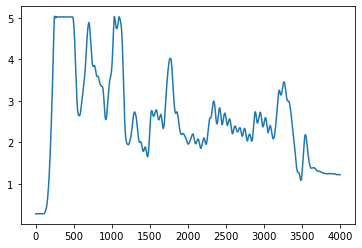

In [4]:
plt.plot(lever)
plt.show()

In [5]:
x = np.arange(len(lever))
    
#Fit an Earth model
model = Earth(thresh=1e-5, minspan=30, penalty=10.0, check_every=1, verbose=True)
model.fit(x,lever)
#Print the model
# print(model.trace())
# print(model.summary())

Beginning forward pass
---------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq   
---------------------------------------------------------------
0     -       -    -     1.300229  1      1.301  0.000  0.000  
1     0       0    277   0.526667  3      0.530  0.595  0.593  
2     0       0    1362  0.439413  5      0.445  0.662  0.658  
3     0       0    3284  0.372714  7      0.380  0.713  0.708  
4     0       0    153   0.324546  9      0.333  0.750  0.744  
5     0       0    3470  0.312324  11     0.322  0.760  0.752  
6     0       0    3129  0.288129  13     0.299  0.778  0.770  
7     0       0    556   0.275402  15     0.287  0.788  0.779  
8     0       0    1083  0.230895  17     0.242  0.822  0.814  
9     0       0    1579  0.205662  19     0.217  0.842  0.833  
10    0       0    928   0.187193  21     0.199  0.856  0.847  
11    0       0    1207  0.157313  23     0.168  0.879  0.871  
12    0       0  

/Users/xizheng/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()


--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   175    0.00  0.005  0.998  0.996  
1     112  174    0.00  0.005  0.998  0.996  
2     73  173    0.00  0.005  0.998  0.996  
3     105  172    0.00  0.005  0.998  0.996  
4     2   171    0.00  0.005  0.998  0.996  
5     86  170    0.00  0.005  0.998  0.996  
6     32  169    0.00  0.005  0.998  0.996  
7     27  168    0.00  0.005  0.998  0.996  
8     145  167    0.00  0.005  0.998  0.996  
9     143  166    0.00  0.005  0.998  0.996  
10    22  165    0.00  0.005  0.998  0.996  
11    19  164    0.00  0.005  0.998  0.997  
12    15  163    0.00  0.005  0.998  0.997  
13    26  162    0.00  0.005  0.998  0.997  
14    18  161    0.00  0.004  0.998  0.997  
15    135  160    0.00  0.004  0.998  0.997  
16    82  159    0.00  0.004  0.998  0.997  
17    29  158    0.00  0.004  0.998  0.997  
18    138  157    0.00  0.004  0.998  0.997  
19  

/Users/xizheng/opt/anaconda3/lib/python3.8/site-packages/pyearth/earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Earth(check_every=1, minspan=30, penalty=10.0, thresh=1e-05, verbose=True)

In [6]:
y_hat = model.predict(x)

knots = []
for bf in model.basis_.piter():
    if bf.has_knot():
        knots.append(bf.get_knot())
print(len(knots))
print(np.sort(knots))

87
[ 122.  153.  184.  215.  246.  277.  494.  556.  587.  649.  680.  711.
  742.  773.  804.  866.  897.  928.  959.  990. 1021. 1052. 1083. 1114.
 1145. 1176. 1207. 1238. 1300. 1362. 1455. 1486. 1517. 1548. 1579. 1610.
 1641. 1672. 1703. 1734. 1765. 1796. 1827. 1858. 1889. 2013. 2044. 2075.
 2106. 2137. 2168. 2199. 2230. 2261. 2323. 2354. 2385. 2416. 2447. 2478.
 2602. 2633. 2726. 2757. 2788. 2819. 2850. 2881. 2912. 2943. 2974. 3098.
 3129. 3160. 3191. 3284. 3315. 3346. 3439. 3470. 3470. 3501. 3532. 3563.
 3594. 3625. 3780.]


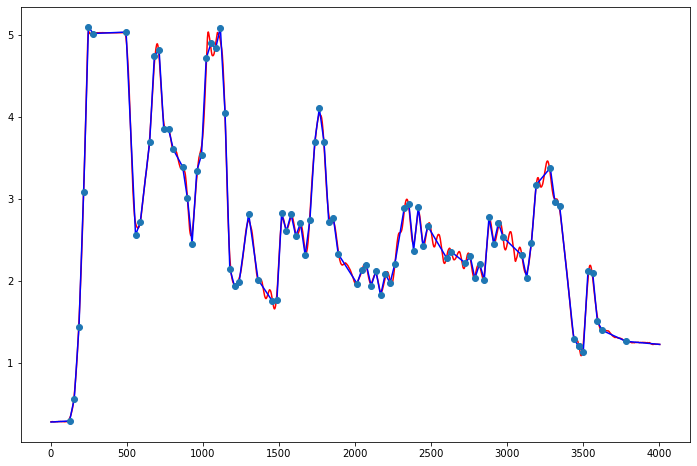

In [7]:
#Plot the model
plt.figure(figsize=(12,8))
plt.plot(x,lever,'r')
plt.plot(x,y_hat,'b')
plt.plot(knots, model.predict(knots), 'o')
plt.show()

In [8]:
vel = np.gradient(y_hat)
acc = np.gradient(vel)
vel2 = np.diff(y_hat, append=y_hat[-1])
acc2 = np.diff(vel2, append=vel2[-1])

peaks, _ = find_peaks(np.abs(acc), height=0.003, distance=20)
peaks2, _ = find_peaks(np.abs(acc2), height=0.005, distance=20)

print(len(peaks))

74


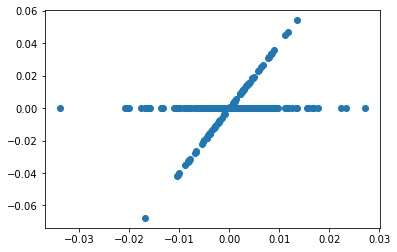

In [9]:
plt.scatter(acc, acc2)

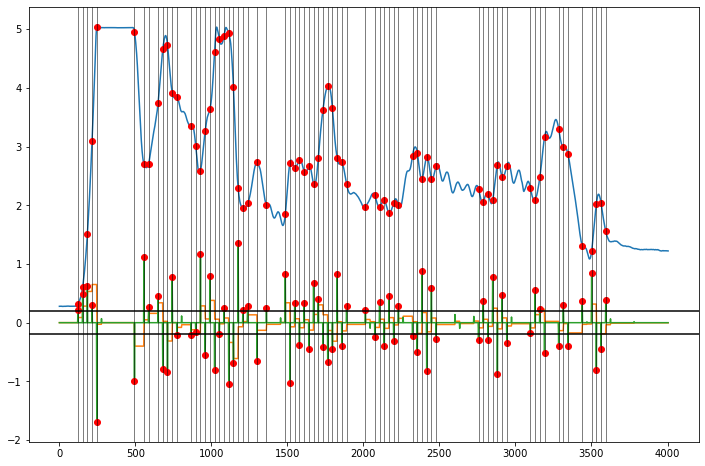

In [10]:
plt.figure(figsize=(12,8))
plt.plot(x,lever)
# plt.plot(x,y_hat)
plt.plot(peaks, lever[peaks], 'or')
# plt.plot(peaks2, lever[peaks2], 'ob')
plt.plot(x, 10*vel)
# plt.plot(x, 50*acc2, 'b')
plt.plot(x, 50*acc)
plt.plot(peaks, 50*acc[peaks], 'or')
plt.axhline(50*0.004, color='k')
plt.axhline(50*-0.004, color='k')
for i in range(len(peaks)):
    plt.axvline(peaks[i], color='k', linewidth=0.5)
plt.show()

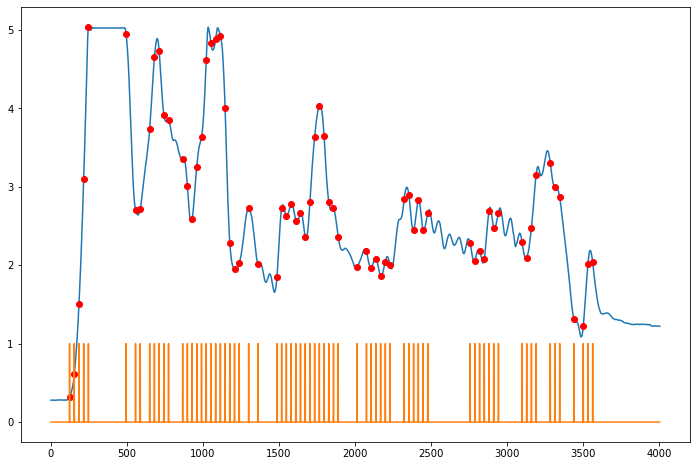

In [11]:
movement = np.zeros(len(peaks)-1)
for i in range(len(peaks)-1):
    movement[i] = abs(lever[peaks[i+1]] - lever[peaks[i]])
    
movement_signal = np.zeros(len(lever))
movement_signal[peaks[:-1]] = movement

large_thresh = 0

movement_signal_large = movement_signal > large_thresh

plt.figure(figsize=(12,8))
plt.plot(lever)
plt.plot(np.where(movement_signal > large_thresh)[0], lever[np.where(movement_signal > large_thresh)[0]], 'or')
plt.plot(movement_signal_large)
plt.show()

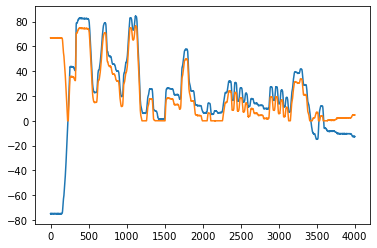

In [12]:
motor = Traces[0,0]['Motor'][0,idx].flatten()
distance_to_target = np.maximum(np.abs(motor)-8, 0)
distance_to_target_movement = distance_to_target[peaks[:-1]]

plt.plot(motor)
plt.plot(distance_to_target)
plt.show()

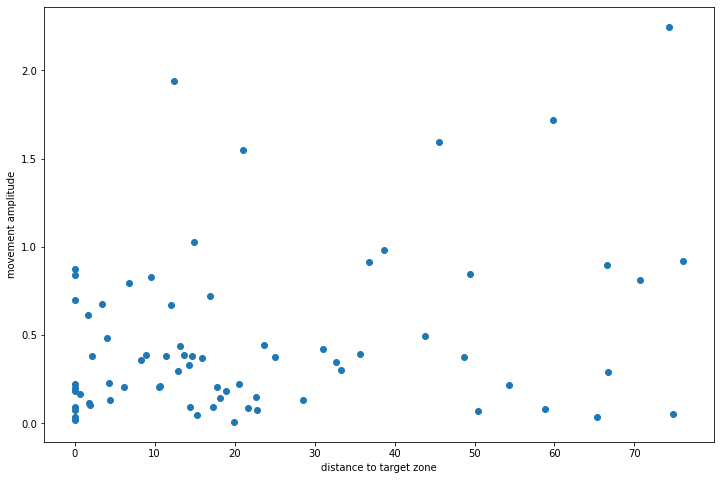

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(distance_to_target_movement, movement)
plt.xlabel("distance to target zone")
plt.ylabel("movement amplitude")
plt.show()

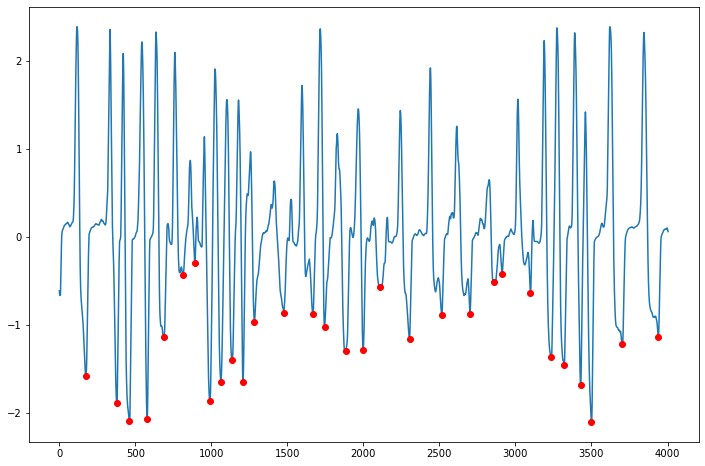

In [14]:
# process respiration
resp = Traces[0,0]['Sniffs'][0,idx].flatten()
trial_on = Traces[0,0]['Trial'][0,idx].flatten()

windowsize = 15
resp = resp - np.median(resp)
resp = -resp
resp = np.convolve(resp, np.ones(windowsize), 'same') / windowsize

resp_pks_2, _ = find_peaks(-resp, prominence=0.3, height=0.2, distance=20)

plt.figure(figsize=(12,8))
plt.plot(resp)
plt.plot(resp_pks_2, resp[resp_pks_2], 'or')
plt.show()

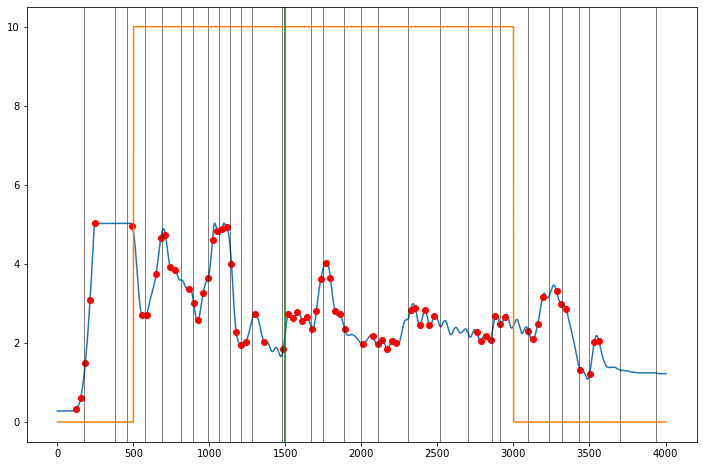

In [15]:
plt.figure(figsize=(12,8))
plt.plot(lever)
plt.plot(np.where(movement_signal > large_thresh)[0], lever[np.where(movement_signal > large_thresh)[0]], 'or')
for i in range(len(resp_pks_2)):
    plt.axvline(resp_pks_2[i], color='k', linewidth=0.5)
plt.plot(5*trial_on)
plt.axvline(1500, color='g')
plt.show()

In [16]:
sniff_intervals = np.diff(resp_pks_2)

move_sniff_trial = np.empty((len(resp_pks_2)-1, 600))
move_sniff_trial[:] = np.nan

for start_idx in range(len(resp_pks_2)-1):
    if trial_on[resp_pks_2[start_idx]] != 0 and resp_pks_2[start_idx] <= 1500: 
        move_sniff_trial[start_idx,:sniff_intervals[start_idx]+50] = movement_signal_large[resp_pks_2[start_idx]-50:resp_pks_2[start_idx+1]]

In [17]:
sniff_trial_lengths = np.sum(~np.isnan(move_sniff_trial), 1)
a_order_trial = np.argsort(sniff_trial_lengths)[::-1]
move_sniff_trial_sorted = move_sniff_trial[a_order_trial,:]

# move_sniff_trial_sorted = move_sniff_trial
move_sniff_trial_sorted_valid = move_sniff_trial_sorted[~np.isnan(move_sniff_trial_sorted).all(axis=1),:]
sniff_trial_lengths_valid = sniff_trial_lengths[sniff_trial_lengths != 0] - 50


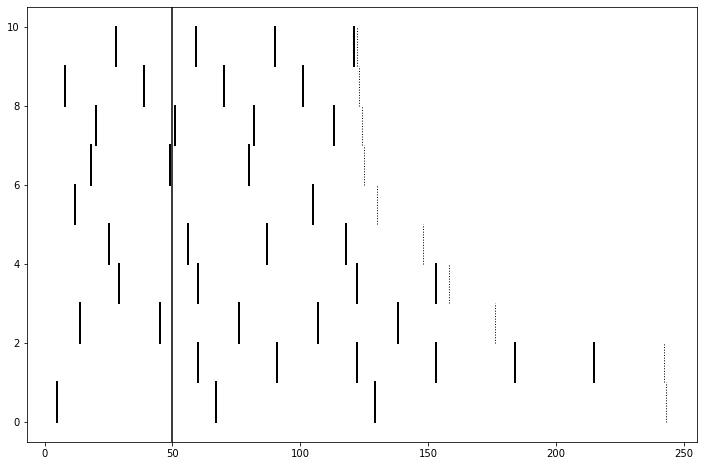

10


In [18]:
plt.figure(figsize=(12,8))
for i in range(move_sniff_trial_sorted_valid.shape[0]):
    moves = np.where(move_sniff_trial_sorted_valid[i,:] == 1)[0]
    for j in range(len(moves)):
        plt.plot((moves[j], moves[j]), (i, i+1), 'k', linewidth=2)
    trial_off = np.sum(~np.isnan(move_sniff_trial_sorted_valid[i,:]))
    plt.plot((trial_off, trial_off), (i, i+1), ':k', linewidth=1)
plt.axvline(50, color='k')
plt.show()
print(move_sniff_trial_sorted_valid.shape[0])

In [20]:
Traces[0,0]['Lever'].shape[1]

423